My first recipe will be pretty simple, but how to add a data file into the actual notebook and then also how to create a new data file CSV. We used this in the first part of Project 7 where we had to create a new CSV file with our data we got from our own personal sources.
How it works:
This code opens the Spotify streaming history JSON file and extracts only the `endTime` field, which indicates when each song finished playing. It first loads the JSON data into a Python object using `json.load()`, then converts it into a Pandas DataFrame. From there, it selects just the `endTime` column and writes it to a new CSV file called `endTime_only.csv`, omitting the index column.


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
with open("StreamingHistory_music_0.json", "r") as file:
    data = json.load(file)

df = pd.DataFrame(data)
end_time_df = df[['endTime']]
end_time_df.to_csv("endTime_only.csv", index=False)
print("CSV file 'endTime_only.csv' has been created.")

CSV file 'endTime_only.csv' has been created.


Here is another way to do this

In [6]:
from pathlib import Path
import pandas as pd

# Load the JSON directly into a DataFrame
file_path = Path("StreamingHistory_music_0.json")
df = pd.read_json(file_path)

# Extract just the 'endTime' column
df[['endTime']].to_csv("endTime_only.csv", index=False)

print("CSV file 'endTime_only.csv' has been created.")


CSV file 'endTime_only.csv' has been created.


This code reads a Spotify streaming history JSON file and extracts the `endTime` field, which records when each song finished playing. It uses `Pathlib` to define the file path and `pandas.read_json()` to directly load the JSON data into a DataFrame, simplifying the process by avoiding manual file handling. From the full dataset, it selects only the `endTime` column and saves it as a new CSV file named `endTime_only.csv`, without including row index numbers.


RECIPE 2

My second recipe will be a simple bar chart, I felt like the bar chart was one of those graphs that I always kept coming back too so the ability to use that will be super nice.

To create the bar chart, the code first groups the dataset by `home_team_name` and sums the `home_team_goal_count` for each team to get their total goals scored at home. It then sorts these totals in descending order so the teams with the highest goal counts appear first. From this, the top 10 teams are selected and plotted using a bar chart, with each bar representing a team's total home goals. The chart includes a title and axis labels, and the team names on the x-axis are rotated for better readability. Finally, `plt.tight_layout()` ensures everything fits cleanly, and `plt.show()` displays the finished chart.



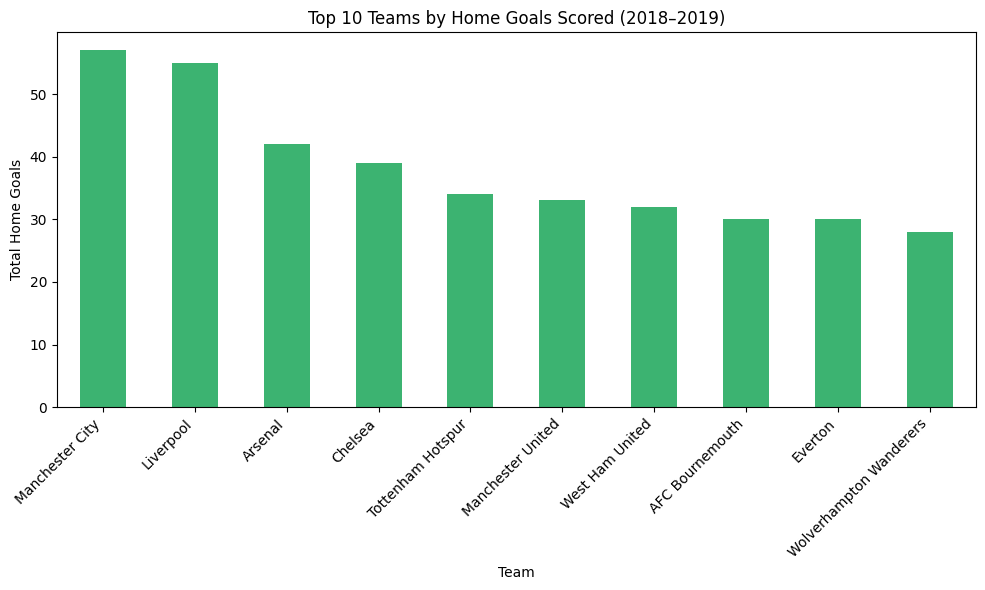

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("england-premier-league-matches-2018-to-2019-stats.csv")

home_goals = df.groupby('home_team_name')['home_team_goal_count'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
home_goals.head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Top 10 Teams by Home Goals Scored (2018–2019)')
plt.xlabel('Team')
plt.ylabel('Total Home Goals')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


RECIPE 3

My next code will also be very simple, but it is helpful finding a bunch of important values about a data set. These are all things that allow you to better understand data sets and what is going on within them.

This code starts by loading the timestamp data from a CSV file and converting the `endTime` column into proper datetime format. It then sorts the data chronologically and calculates the time difference between each consecutive timestamp using the `.diff()` function. To identify key patterns, the code finds the longest time gap between two timestamps and calculates the average time between all timestamps. It also extracts just the date portion from each timestamp to count how many entries occurred per day, then identifies the single day with the most activity. Finally, it prints out all three results for quick insight.


In [4]:
import pandas as pd

df = pd.read_csv("data_science_project_timstamps.csv")

df['endTime'] = pd.to_datetime(df['endTime'], errors='coerce')
df = df.dropna(subset=['endTime'])
df = df.sort_values(by='endTime').reset_index(drop=True)

df['time_diff'] = df['endTime'].diff()

longest_gap = df['time_diff'].max()   #The diff max mean min are all pretty straight forward, but they are the things that help us answer the questions. diff is subtraction

average_gap = df['time_diff'].mean()

df['date'] = df['endTime'].dt.date
most_active_day = df['date'].value_counts().idxmax()
most_active_count = df['date'].value_counts().max()

print(f"Longest time between timestamps: {longest_gap}")
print(f"Average time between timestamps: {average_gap}")
print(f"Day with most timestamps: {most_active_day} ({most_active_count} entries)")


Longest time between timestamps: 4 days 06:57:00
Average time between timestamps: 0 days 00:48:51.017101710
Day with most timestamps: 2024-10-02 (141 entries)


Recipe 4

My final recipe will actually be using the Random Forest Algorthim that I used in my final project, itll be a bit longer to set it all up but I am just going to copy the code over.


The code uses RandomForestClassifier to model the relationship between the selected features (X) and whether a team won (y). The model is trained on all the team-level match data.It calculates each team’s probability of winning each match using .predict_proba() and stores this in a new column win_prob_rf.A unique match_id is assigned to group each match’s home and away team together. Then, for each match, the team with the highest predicted probability of winning is selected as the predicted winner.It counts how many times each team was predicted to win using the model. This becomes their “deserved wins,” forming the basis of a predicted league table.It calculates the top 6 most important features used by the Random Forest and adds those importance values as columns next to each team in the table, for transparency.

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv("/content/england-premier-league-matches-2018-to-2019-stats.csv")
print("Columns:", df.columns.tolist())
df['home_win'] = (df['home_team_goal_count'] > df['away_team_goal_count']).astype(int)
df['away_win'] = (df['away_team_goal_count'] > df['home_team_goal_count']).astype(int)

home_df = df.copy()
home_df['team'] = home_df['home_team_name']
home_df['opponent'] = home_df['away_team_name']
home_df['goals_for'] = home_df['home_team_goal_count']
home_df['goals_against'] = home_df['away_team_goal_count']
home_df['win'] = home_df['home_win']
home_df['is_home'] = 1

away_df = df.copy()
away_df['team'] = away_df['away_team_name']
away_df['opponent'] = away_df['home_team_name']
away_df['goals_for'] = away_df['away_team_goal_count']
away_df['goals_against'] = away_df['home_team_goal_count']
away_df['win'] = away_df['away_win']
away_df['is_home'] = 0

combined = pd.concat([home_df, away_df], ignore_index=True)

betting_cols = [col for col in combined.columns if 'odds' in col or 'bookmaker' in col or 'bet' in col]
drop_cols = ['home_team_name', 'away_team_name',
             'home_team_goal_count', 'away_team_goal_count',
             'home_win', 'away_win'] + betting_cols
combined = combined.drop(columns=drop_cols)

if 'team_a_xg' in combined.columns and 'team_b_xg' in combined.columns:
    combined['xg_diff'] = combined['team_a_xg'] - combined['team_b_xg']
else:
    combined['xg_diff'] = 0

exclude_keywords = ['goal', 'score', 'goals_for', 'goals_against', 'win']
numeric = combined.select_dtypes(include='number')
non_goal_cols = [col for col in numeric.columns if not any(key in col for key in exclude_keywords)]
if 'xg_diff' not in non_goal_cols:
    non_goal_cols.append('xg_diff')

X = combined[non_goal_cols]
y = combined['win']                                                         #i will be focused on this part, how does the algorithim work and what can it help you predict. A explantion of the entire code is to much
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)


combined['win_prob_rf'] = rf.predict_proba(X)[:, 1]

combined['match_id'] = combined.groupby(['date_GMT', 'stadium_name']).ngroup()

rf_scores = combined[['match_id', 'team', 'win_prob_rf']]
winners_rf = rf_scores.loc[rf_scores.groupby('match_id')['win_prob_rf'].idxmax()].reset_index(drop=True)

deserved_table_rf = winners_rf['team'].value_counts().reset_index()
deserved_table_rf.columns = ['team', 'deserved_wins']

importances = pd.Series(rf.feature_importances_, index=non_goal_cols)
top_importances = importances.sort_values(ascending=False).head(6)

for stat in top_importances.index:
    deserved_table_rf[f'importance_{stat}'] = importances[stat]

deserved_table_rf = deserved_table_rf.sort_values(by='deserved_wins', ascending=False).reset_index(drop=True)
deserved_table_rf.index += 1
deserved_table_rf.index.name = 'Rank'
print(deserved_table_rf)

Columns: ['timestamp', 'date_GMT', 'status', 'attendance', 'home_team_name', 'away_team_name', 'referee', 'Game Week', 'Pre-Match PPG (Home)', 'Pre-Match PPG (Away)', 'home_ppg', 'away_ppg', 'home_team_goal_count', 'away_team_goal_count', 'total_goal_count', 'total_goals_at_half_time', 'home_team_goal_count_half_time', 'away_team_goal_count_half_time', 'home_team_goal_timings', 'away_team_goal_timings', 'home_team_corner_count', 'away_team_corner_count', 'home_team_yellow_cards', 'home_team_red_cards', 'away_team_yellow_cards', 'away_team_red_cards', 'home_team_first_half_cards', 'home_team_second_half_cards', 'away_team_first_half_cards', 'away_team_second_half_cards', 'home_team_shots', 'away_team_shots', 'home_team_shots_on_target', 'away_team_shots_on_target', 'home_team_shots_off_target', 'away_team_shots_off_target', 'home_team_fouls', 'away_team_fouls', 'home_team_possession', 'away_team_possession', 'Home Team Pre-Match xG', 'Away Team Pre-Match xG', 'team_a_xg', 'team_b_xg', '